In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Obter base de dados de imigração para o Canadá
df = pd.read_csv('../dados/canadian_immegration_data.csv')

# Transformar a coluna 'Country' em índice no data frame
df.set_index('Country', inplace=True)

# Criar lista com anos de 1980 a 2013 em forma de string
anos = list(map(str,range(1980, 2014))) 

# Obter os dados de imigração do Brasil de 1980 a 2013
brasil = df.loc['Brazil', anos]

# Criar Dictionary com os dados de imigração do Brasil
brasil_dict = {
    'ano': brasil.index.tolist(),
    'imigracao': brasil.values.tolist()
}

# Criar DataFrame com os dados de imigração do Brasil
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,ano,imigracao
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


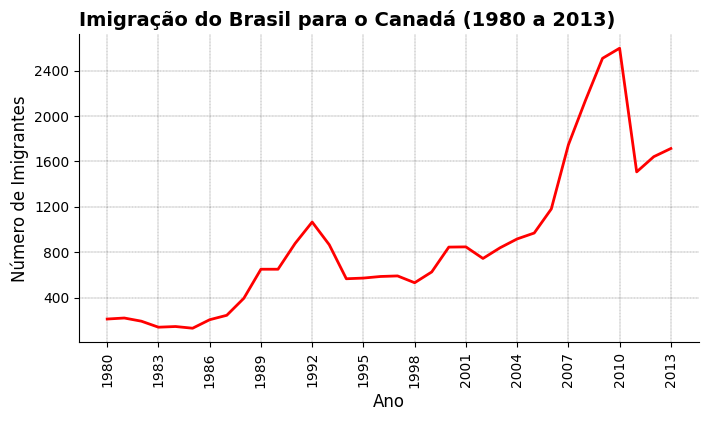

In [128]:
# Criar gráfico de linha com os dados de imigração do Brasil para o Canadá
figure, ax = plt.subplots(figsize=(8, 4))

ax.plot(dados_brasil['ano'], dados_brasil['imigracao'], lw=2, color='r')
ax.set_title('Imigração do Brasil para o Canadá (1980 a 2013)', fontsize=14, fontweight='bold', loc='left')

ax.xaxis.set_major_locator(plt.MultipleLocator(3)) # Mostrar rótulos do eixo X a cada 5 unidades
ax.set_xlabel('Ano', fontsize=12)
ax.xaxis.set_tick_params(rotation=90, labelsize=10) # Rotacionar rótulos do eixo X em 45 graus

ax.yaxis.set_major_locator(plt.MultipleLocator(400)) # Mostrar rótilos do eixo Y a cada 100 unidades
ax.set_ylabel('Número de Imigrantes', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)

ax.grid(linestyle='--', linewidth='0.2', color='black')

# Remover barras superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# print(plt.style.available)
plt.style.use('tableau-colorblind10')

plt.savefig(
    '../resultados/line_chart_imigracao_brasil_para_o_canada.png', 
    dpi=300, 
    transparent=False, 
    bbox_inches='tight'
)

plt.show()

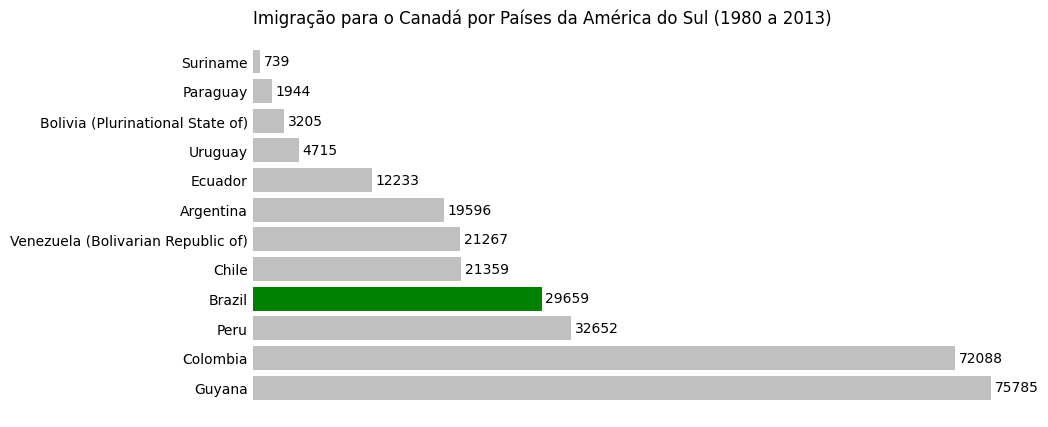

In [129]:
# Obter países da américa do sul
america_do_sul = df.query('Region == "South America"').sort_values('Total', ascending=False)
america_do_sul_ordenada = america_do_sul.sort_values('Total', ascending=False)

# Criar cores para o gráfico de barras (ressaltar Brasil)
cores = []
for pais in america_do_sul_ordenada.index:
    if pais == 'Brazil':
        cores.append('green')
    else:
        cores.append('silver')

# Criar gráfico de barras horizontais
figure, ax = plt.subplots(figsize=(10, 5))
ax.barh(america_do_sul_ordenada.index, america_do_sul_ordenada['Total'], color=cores) # (x, y, ...)

ax.xaxis.set_major_locator(plt.MultipleLocator(5000))
ax.xaxis.set_tick_params(rotation=45)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='both', which='both', length=0) # Remover marcações dos eixos X e Y

ax.set_title('Imigração para o Canadá por Países da América do Sul (1980 a 2013)', fontsize=12, loc='left')
ax.set_frame_on(False)

for i, v in (enumerate(america_do_sul_ordenada['Total'])):
    posicao_no_eixo_x = v + 400
    posicao_no_eixo_y = i
    quantidade_de_imigrantes = str(v)

    ax.text(posicao_no_eixo_x, posicao_no_eixo_y, quantidade_de_imigrantes, color='black', fontsize=10, ha='left', va='center')

# print(figure.canvas.get_supported_filetypes())

# Salvar gráfico em um arquivo PNG
figure.savefig(
    '../resultados/horizontal_bar_chart_imigracao_paises_america_do_sul_para_o_canada.png', 
    dpi=300, 
    transparent=False, 
    bbox_inches='tight'
    )

plt.show()